<a href="https://colab.research.google.com/github/thetwinsk/DeepLearningNLP/blob/main/Predict_hotel_cancellations_with_a_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/kaggle/kaggleCourses/Intro to Deep Learning/6. Binary Classification/

/content/drive/My Drive/kaggle/kaggleCourses/Intro to Deep Learning/6. Binary Classification


## I.. Get-To-Know and Preprocessing

In [5]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

In [7]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
X.shape

(119390, 31)

In [9]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
y.shape

(119390,)

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [13]:
X['arrival_date_month'] = X['arrival_date_month'].map({'January':1, 'February': 2, 'March':3,
                                                       'April':4, 'May':5, 'June':6, 'July':7,
                                                       'August':8, 'September':9, 'October':10,
                                                       'November':11, 'December':12})

In [15]:
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [16]:
features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]

In [17]:
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

In [19]:
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)

In [20]:
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

In [21]:
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [23]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

In [24]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [25]:
X_train.shape

(89542, 63)

In [31]:
y_train.shape

(89542,)

In [32]:
input_shape = [X_train.shape[1]]

## II.. Modeling

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [36]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [37]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5, # how many epochs to wait before stopping
    min_delta=0.001, # minimium amount of change to count as an improvement
    restore_best_weights=True,
)

In [38]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
175/175 [==============================] - 5s 21ms/step - loss: 0.4822 - binary_accuracy: 0.7734 - val_loss: 0.4316 - val_binary_accuracy: 0.7939
Epoch 2/200
175/175 [==============================] - 3s 19ms/step - loss: 0.4233 - binary_accuracy: 0.8011 - val_loss: 0.4021 - val_binary_accuracy: 0.8132
Epoch 3/200
175/175 [==============================] - 3s 19ms/step - loss: 0.4102 - binary_accuracy: 0.8080 - val_loss: 0.3934 - val_binary_accuracy: 0.8178
Epoch 4/200
175/175 [==============================] - 3s 18ms/step - loss: 0.4033 - binary_accuracy: 0.8111 - val_loss: 0.3908 - val_binary_accuracy: 0.8204
Epoch 5/200
175/175 [==============================] - 3s 18ms/step - loss: 0.3973 - binary_accuracy: 0.8140 - val_loss: 0.3850 - val_binary_accuracy: 0.8235
Epoch 6/200
175/175 [==============================] - 3s 19ms/step - loss: 0.3923 - binary_accuracy: 0.8168 - val_loss: 0.3840 - val_binary_accuracy: 0.8193
Epoch 7/200
175/175 [==============================]

In [39]:
history_df = pd.DataFrame(history.history)

In [40]:
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.482197,0.773402,0.431607,0.793856
1,0.423314,0.801144,0.402097,0.813220
2,0.410155,0.808001,0.393362,0.817810
3,0.403338,0.811083,0.390769,0.820390
4,0.397340,0.814020,0.384971,0.823472


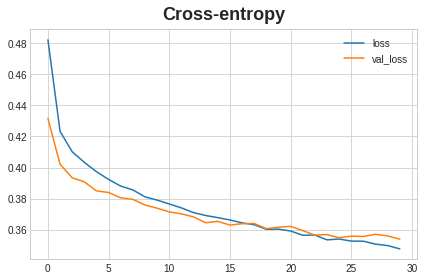

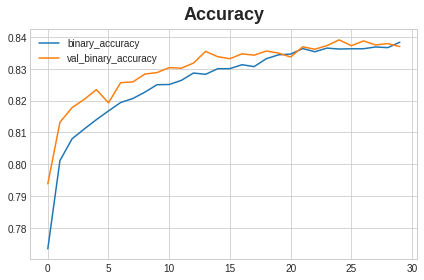

In [41]:
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")